In [6]:
!pip install scikit-learn



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
!pip install scikit-learn



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import sklearn
print(sklearn.__version__)


1.5.1


In [12]:
import sys
print(sys.executable)


C:\Users\dhrub\AppData\Local\Programs\Python\Python312\python.exe


In [5]:
# Import required dependencies
import pandas as pd
pd.options.display.max_columns=99
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np       

In [2]:
import os

In [3]:
pwd

'C:\\Users\\dhrub\\Downloads\\Py'

In [7]:
bike_dataset = pd.read_csv("C:\\Users\\dhrub\\Downloads\\archive (27)\\hour.csv")

In [8]:
# Show dataset shape
bike_dataset.shape
# Show the first five samples in the dataset
bike_dataset.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [9]:
# Show some statistical info about the dataset
bike_dataset.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [10]:
# Check if there is any none(missing) values in the dataset to decide if will make a data cleaning or not
bike_dataset.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
# Rename some columns
print(bike_dataset.columns)
bike_dataset = bike_dataset.rename(columns={'yr':'year',
                                            'mnth':'month',
                                            'hum':'humidity',
                                            'weathersit':'weather',
                                            'cnt':'count',
                                           'hr':'hour'})
# Show dataset columns after rename some columns
print(bike_dataset.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
Index(['instant', 'dteday', 'season', 'year', 'month', 'hour', 'holiday',
       'weekday', 'workingday', 'weather', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count'],
      dtype='object')


In [12]:
# Show unique values for each column
for col in bike_dataset.columns:
    print(f"the columns {col} has: ",end='')
    print(len(bike_dataset[col].unique()),'unique values\n')

the columns instant has: 17379 unique values

the columns dteday has: 731 unique values

the columns season has: 4 unique values

the columns year has: 2 unique values

the columns month has: 12 unique values

the columns hour has: 24 unique values

the columns holiday has: 2 unique values

the columns weekday has: 7 unique values

the columns workingday has: 2 unique values

the columns weather has: 4 unique values

the columns temp has: 50 unique values

the columns atemp has: 65 unique values

the columns humidity has: 89 unique values

the columns windspeed has: 30 unique values

the columns casual has: 322 unique values

the columns registered has: 776 unique values

the columns count has: 869 unique values



In [13]:
print(len(bike_dataset.columns))

17


the column season has:  season
3    4496
2    4409
1    4242
4    4232
Name: count, dtype: int64
the column year has:  year
1    8734
0    8645
Name: count, dtype: int64
the column month has:  month
5     1488
7     1488
12    1483
8     1475
3     1473
10    1451
6     1440
4     1437
9     1437
11    1437
1     1429
2     1341
Name: count, dtype: int64
the column hour has:  hour
17    730
16    730
13    729
15    729
14    729
12    728
22    728
21    728
20    728
19    728
18    728
23    728
11    727
10    727
9     727
8     727
7     727
0     726
6     725
1     724
5     717
2     715
4     697
3     697
Name: count, dtype: int64
the column holiday has:  holiday
0    16879
1      500
Name: count, dtype: int64
the column weekday has:  weekday
6    2512
0    2502
5    2487
1    2479
3    2475
4    2471
2    2453
Name: count, dtype: int64
the column workingday has:  workingday
1    11865
0     5514
Name: count, dtype: int64
the column weather has:  weather
1    11413
2     454

<Figure size 500x500 with 0 Axes>

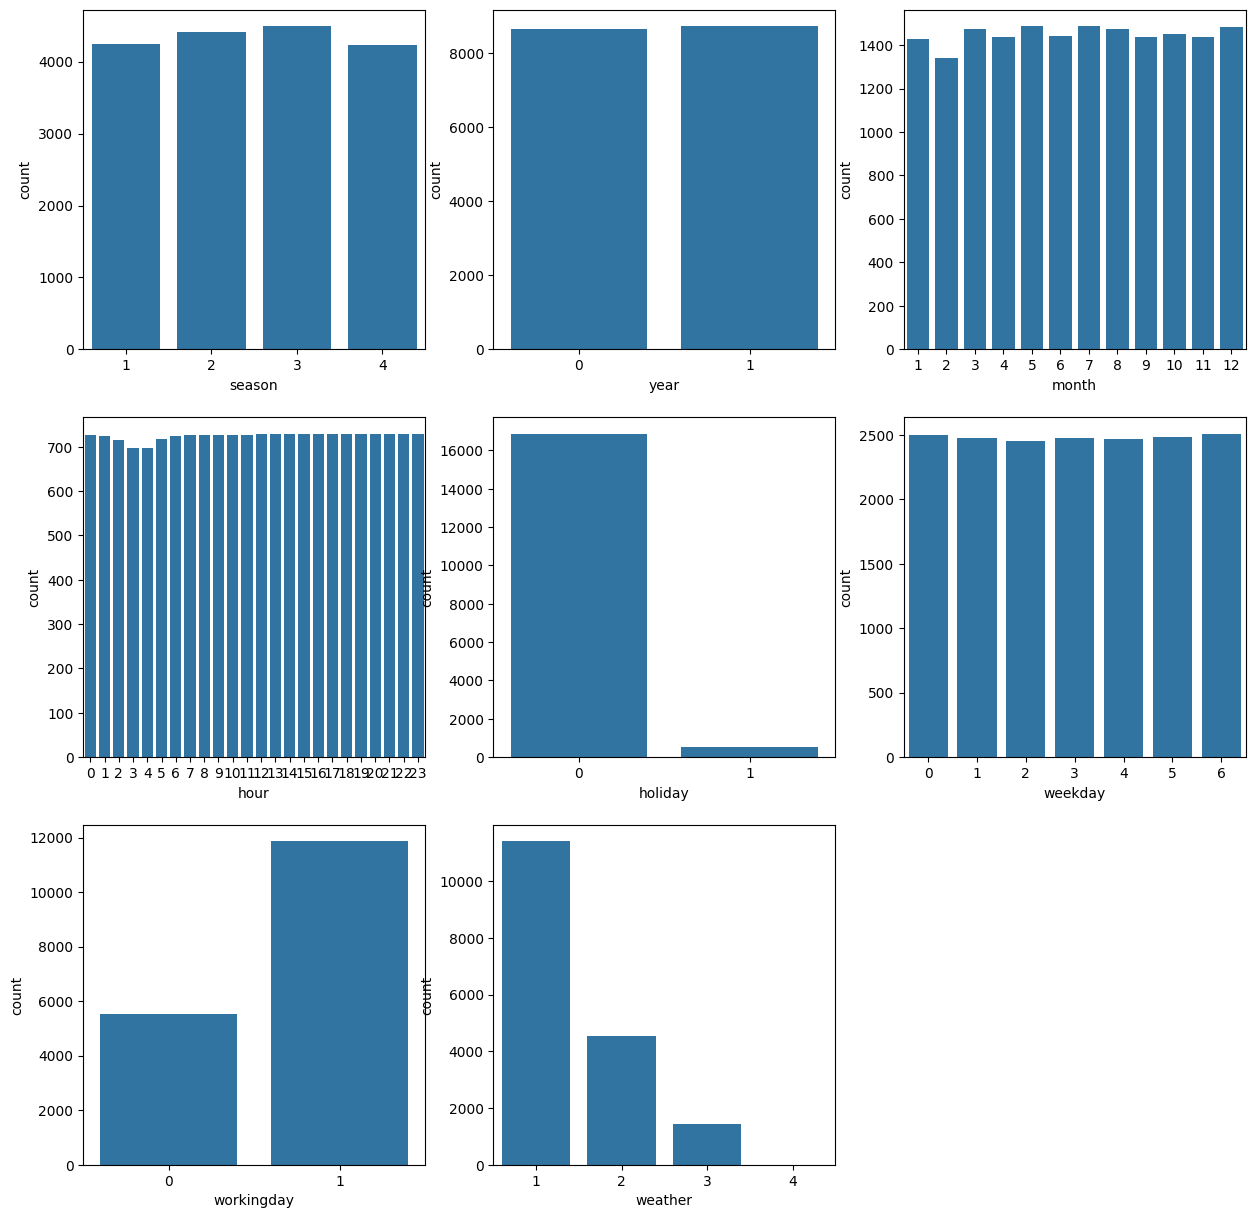

In [14]:
# Count values for each columns that has counted values and plot this count
plt.figure(figsize=(5,5))
counter=1
plt.figure(figsize=(15,15))
for col in bike_dataset.columns:
    if col not in ['instant','dteday','count','registered','casual','windspeed','humidity','atemp','temp']:
        print(f"the column {col} has: ",bike_dataset[col].value_counts())
        plt.subplot(3,3,counter)
        sns.countplot(x=col,data=bike_dataset)
        counter+=1
plt.show()   

the disttribution of column count is: 


C:\Users\dhrub\AppData\Local\Temp\ipykernel_22468\251975416.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bike_dataset[col],color=color_dist)


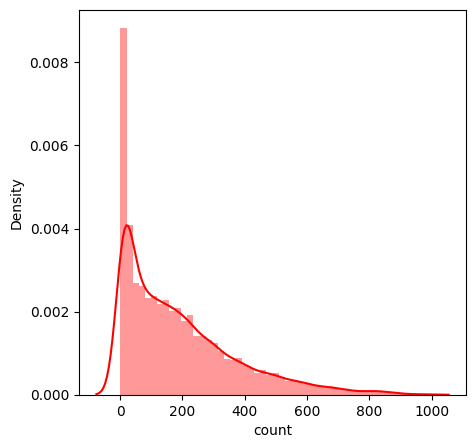

the disttribution of column temp is: 


C:\Users\dhrub\AppData\Local\Temp\ipykernel_22468\251975416.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bike_dataset[col],color=color_dist)


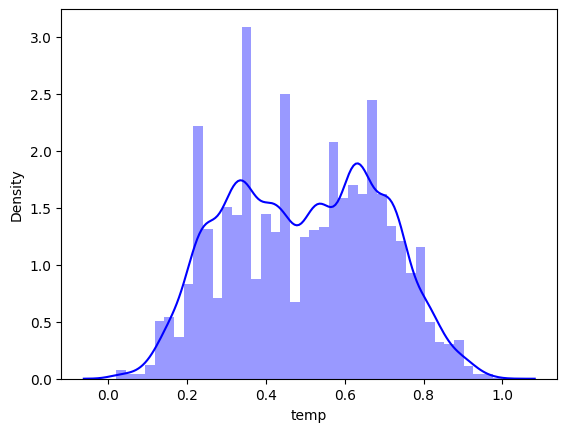

In [15]:
# Visualize distribtuion for each columns that has a lot of values
plt.figure(figsize=(5,5))
for col,color_dist in zip(['count','temp'],['red','blue']):
    print(f"the disttribution of column {col} is: ")
    sns.distplot(bike_dataset[col],color=color_dist)
    plt.show()

C:\Users\dhrub\AppData\Local\Temp\ipykernel_22468\98030995.py:3: FutureWarning: The provided callable <function mean at 0x0000022D26BE3D80> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  weekday_relation = bike_dataset.pivot_table(index='weekday',values='count',aggfunc=np.mean)


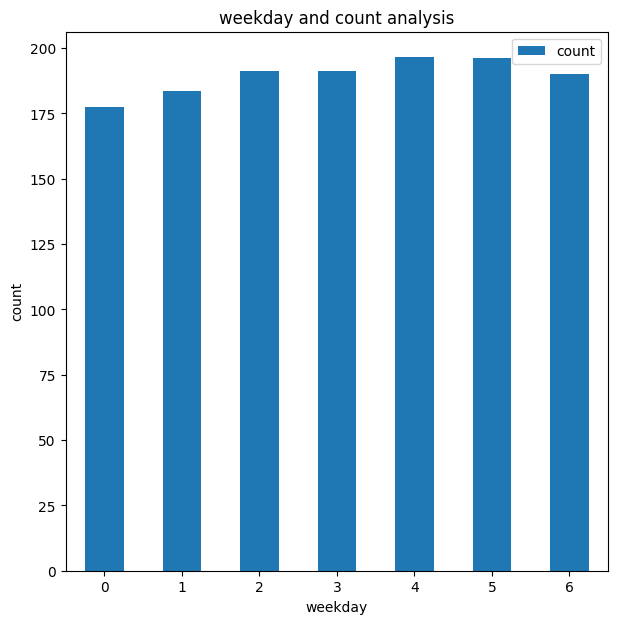

C:\Users\dhrub\AppData\Local\Temp\ipykernel_22468\98030995.py:11: FutureWarning: The provided callable <function mean at 0x0000022D26BE3D80> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  holiday_relation = bike_dataset.pivot_table(index='holiday',values='count',aggfunc=np.mean)


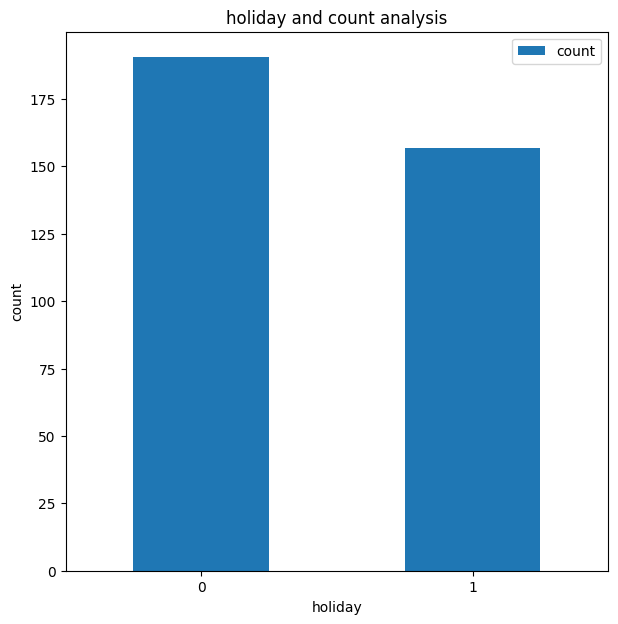

C:\Users\dhrub\AppData\Local\Temp\ipykernel_22468\98030995.py:19: FutureWarning: The provided callable <function mean at 0x0000022D26BE3D80> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  holiday_relation = bike_dataset.pivot_table(index='season',values='count',aggfunc=np.mean)


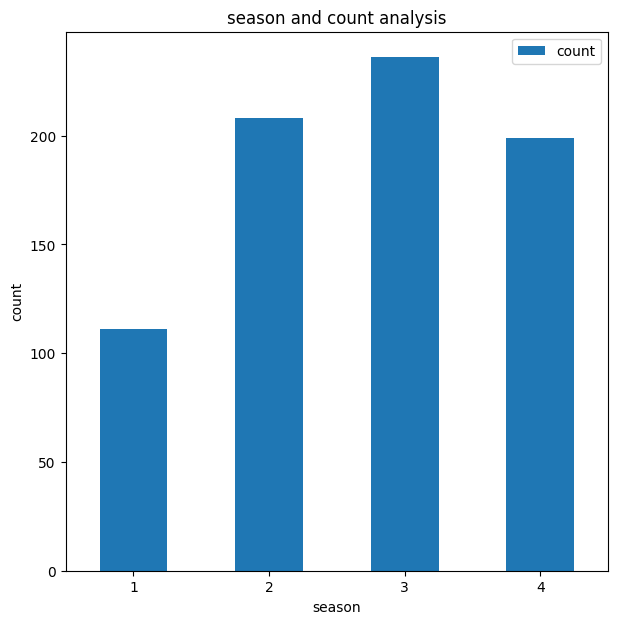

C:\Users\dhrub\AppData\Local\Temp\ipykernel_22468\98030995.py:27: FutureWarning: The provided callable <function mean at 0x0000022D26BE3D80> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  holiday_relation = bike_dataset.pivot_table(index='month',values='count',aggfunc=np.mean)


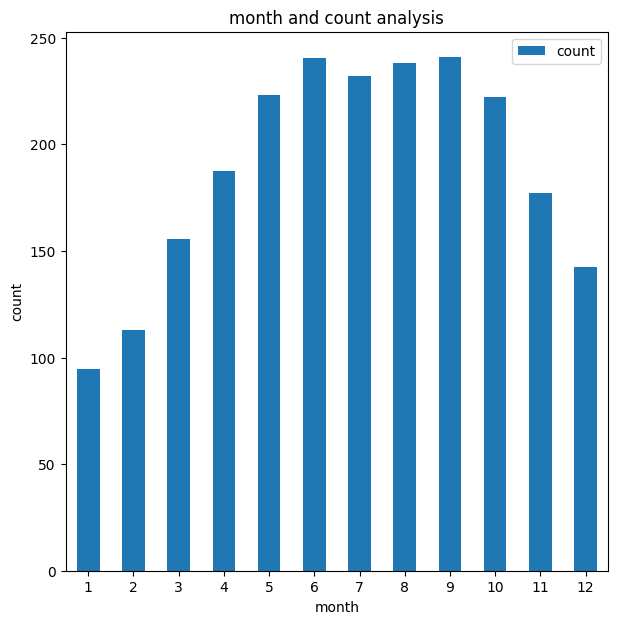

In [16]:
# group by index and make a aggfunc for values
# Bivariate analysis for weekday and count columns
weekday_relation = bike_dataset.pivot_table(index='weekday',values='count',aggfunc=np.mean)
weekday_relation.plot(kind='bar',figsize=(7,7))
plt.xlabel('weekday')
plt.ylabel('count')
plt.title('weekday and count analysis')
plt.xticks(rotation=0)
plt.show()
# Bivariate analysis for weekday and count columns
holiday_relation = bike_dataset.pivot_table(index='holiday',values='count',aggfunc=np.mean)
holiday_relation.plot(kind='bar',figsize=(7,7))
plt.xlabel('holiday')
plt.ylabel('count')
plt.title('holiday and count analysis')
plt.xticks(rotation=0)
plt.show()
# Bivariate analysis for season and count columns
holiday_relation = bike_dataset.pivot_table(index='season',values='count',aggfunc=np.mean)
holiday_relation.plot(kind='bar',figsize=(7,7))
plt.xlabel('season')
plt.ylabel('count')
plt.title('season and count analysis')
plt.xticks(rotation=0)
plt.show()
# Bivariate analysis for month and count columns
holiday_relation = bike_dataset.pivot_table(index='month',values='count',aggfunc=np.mean)
holiday_relation.plot(kind='bar',figsize=(7,7))
plt.xlabel('month')
plt.ylabel('count')
plt.title('month and count analysis')
plt.xticks(rotation=0)
plt.show()

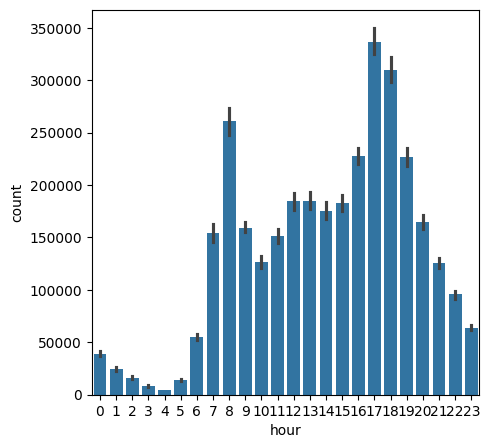

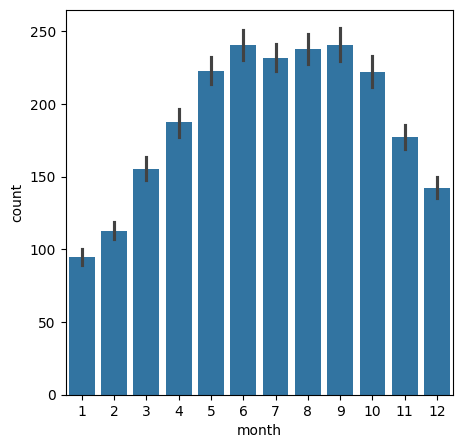

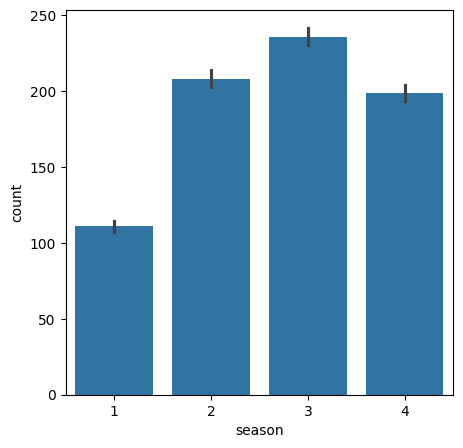

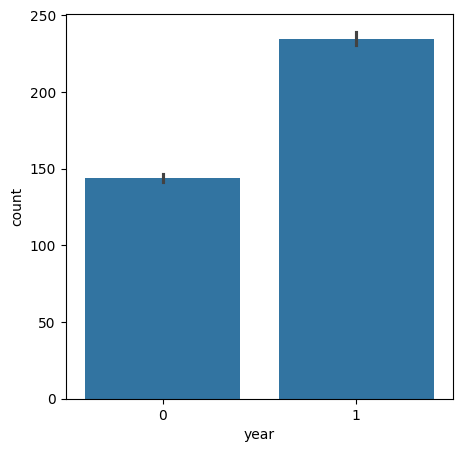

In [17]:
# groupby x and make a estimator for y-axis and without estimator the default is mean
# plot bars of count for hour
plt.figure(figsize=(5,5))
sns.barplot(data=bike_dataset,x='hour',y='count',estimator=sum)
plt.show()
# plot bars of count for month
plt.figure(figsize=(5,5))
sns.barplot(data=bike_dataset,x='month',y='count')
plt.show()
# plot bars of count for season
plt.figure(figsize=(5,5))
sns.barplot(data=bike_dataset,x='season',y='count')
plt.show()
# plot bars of count for year
plt.figure(figsize=(5,5))
sns.barplot(data=bike_dataset,x='year',y='count')
plt.show()

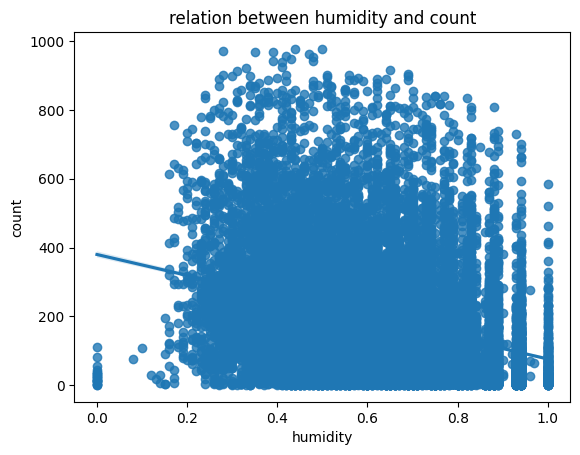

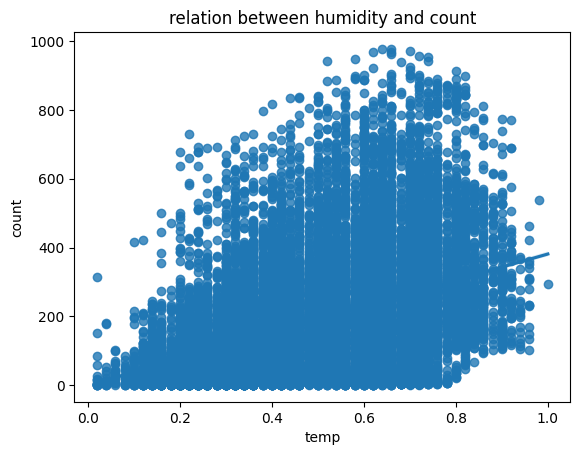

In [18]:
sns.regplot(x=bike_dataset['humidity'],y=bike_dataset['count'])
plt.title('relation between humidity and count')
plt.show()
sns.regplot(x=bike_dataset['temp'],y=bike_dataset['count'])
plt.title('relation between humidity and count')
plt.show()

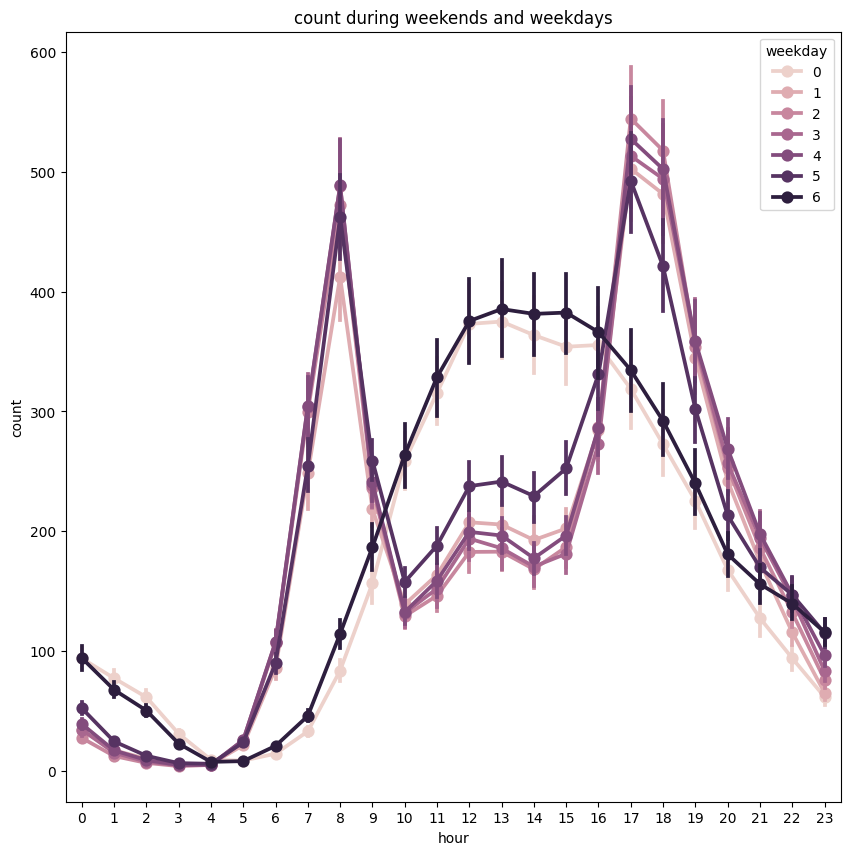

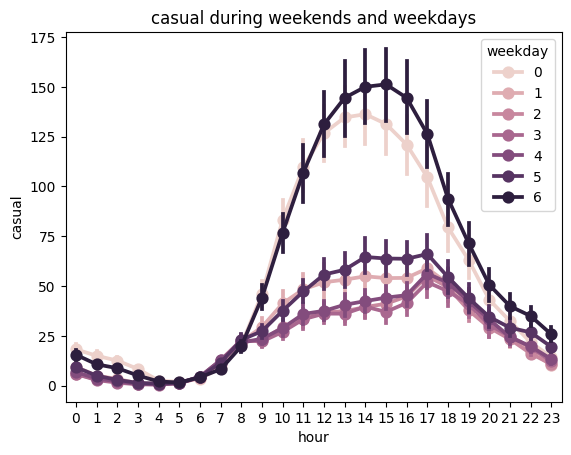

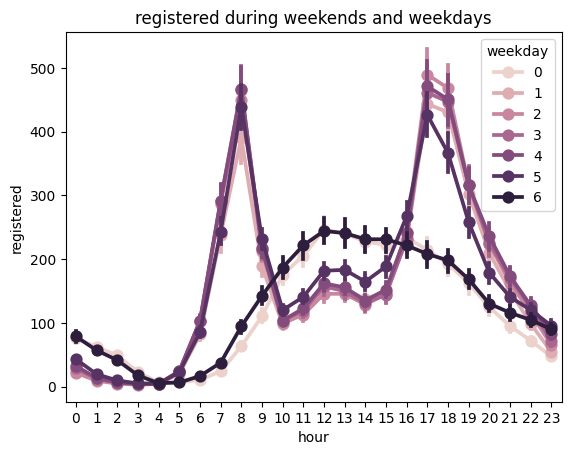

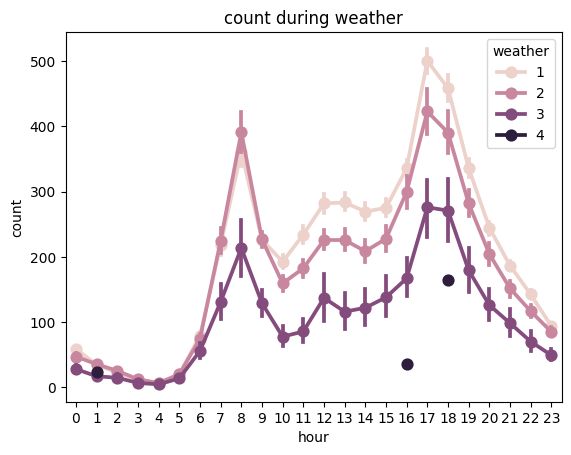

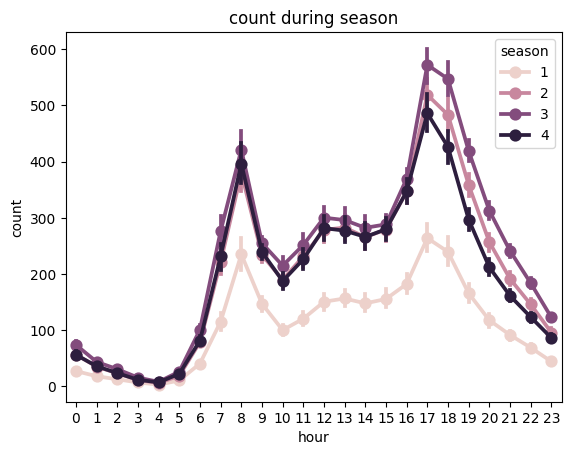

In [19]:
# plot count during weekends and weekdays
plt.figure(figsize=(10,10))
sns.pointplot(data=bike_dataset, x='hour', y='count', hue='weekday')
plt.title('count during weekends and weekdays')
plt.show()
# plot casual during weekends and weekdays
sns.pointplot(data=bike_dataset, x='hour', y='casual', hue='weekday')
plt.title('casual during weekends and weekdays')
plt.show()
# plot registered during weekends and weekdays
sns.pointplot(data=bike_dataset, x='hour', y='registered', hue='weekday')
plt.title('registered during weekends and weekdays')
plt.show()
# plot count during weather
sns.pointplot(data=bike_dataset, x='hour', y='count', hue='weather')
plt.title('count during weather')
plt.show()
# plot count during season
sns.pointplot(data=bike_dataset, x='hour', y='count', hue='season')
plt.title('count during season')
plt.show()

In [20]:
bike_dataset = bike_dataset.drop(columns=['instant','dteday','year'],axis=1)

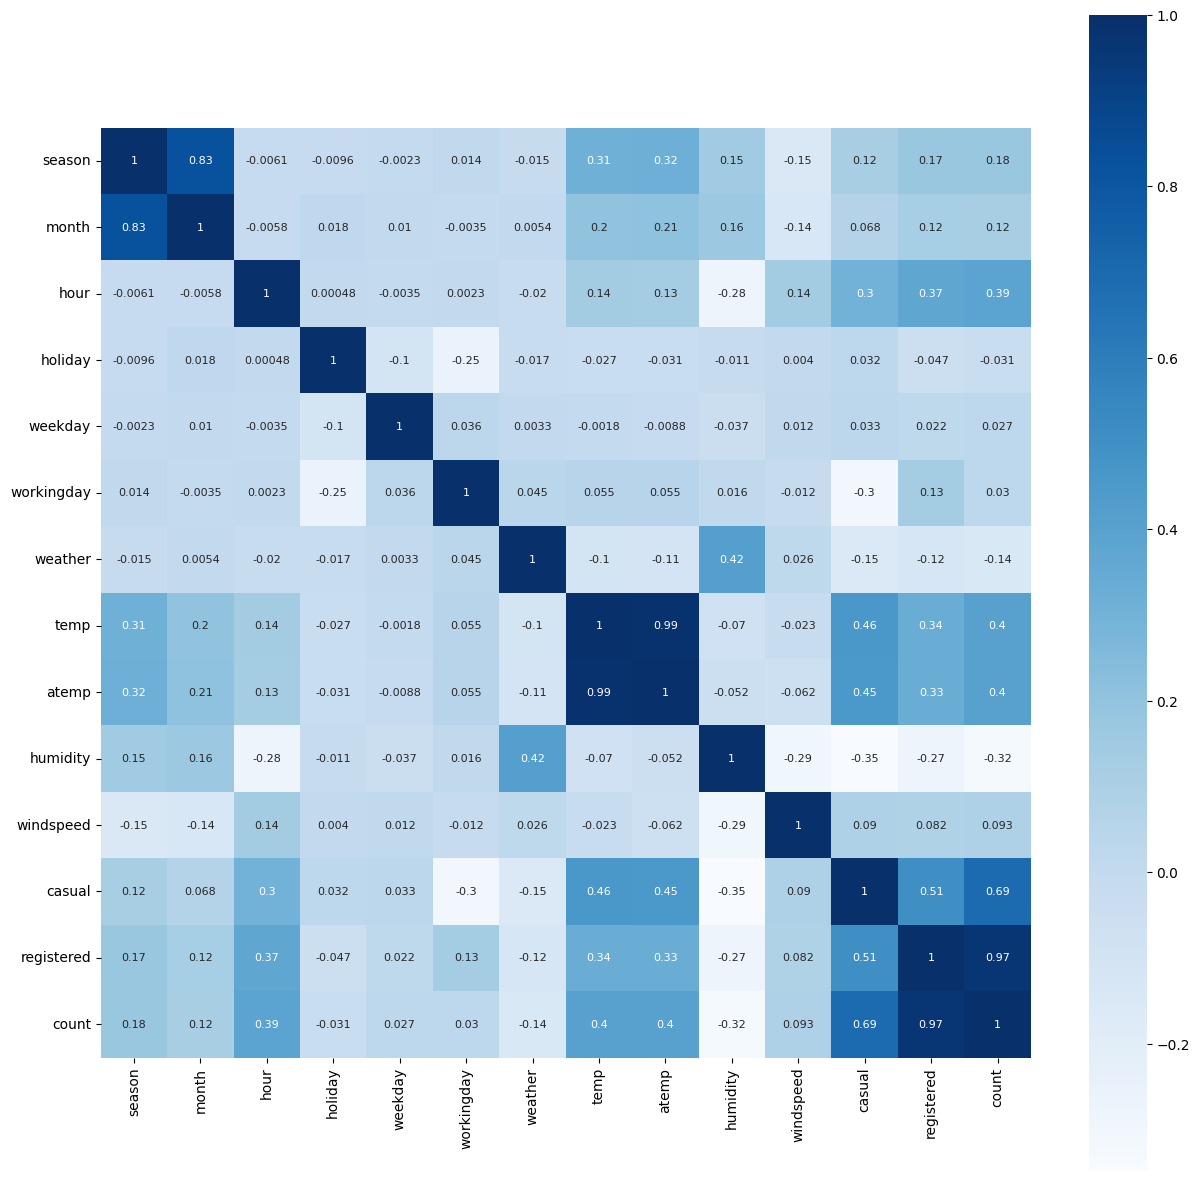

In [21]:
# Find correlation between all dataset features
correlation_values = bike_dataset.corr()
# plot correlation 
plt.figure(figsize=(15,15))
sns.heatmap(correlation_values,cbar=True,square=True,annot=True,annot_kws={'size':8},cmap='Blues')
plt.show() 

In [22]:
cols = ['season','month','hour','holiday','weekday','workingday','weather']
for col in cols:
    bike_dataset[col] = bike_dataset[col].astype('category')

In [23]:
bike_dataset.head()
bike_dataset_oh = bike_dataset
bike_dataset_oh.head()

def one_hot_encoder(data,column):
    data = pd.concat([data,pd.get_dummies(bike_dataset[column],prefix=column,drop_first=True)],axis=1)
    data = data.drop(columns = [column],axis=1)
    return data
for col in cols:
    bike_dataset_oh = one_hot_encoder(bike_dataset_oh,col)

In [24]:
bike_dataset_oh.head()

,temp,atemp,humidity,windspeed,casual,registered,count,season_2,season_3,season_4,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_2,weather_3,weather_4
0,0.24,0.2879,0.81,0.0,3,13,16,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,0.22,0.2727,0.80,0.0,8,32,40,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,0.22,0.2727,0.80,0.0,5,27,32,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,0.24,0.2879,0.75,0.0,3,10,13,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,0.24,0.2879,0.75,0.0,0,1,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [25]:
# Split data into input and label data
X = bike_dataset_oh.drop(columns=['atemp','windspeed','casual','registered','count'],axis=1)
Y = bike_dataset_oh['count']

In [26]:
# Split data into train and test data
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.7)
print(X.shape,x_train.shape,x_test.shape)
print(Y.shape,y_train.shape,y_test.shape)

(17379, 50) (12165, 50) (5214, 50)
(17379,) (12165,) (5214,)


In [27]:
def plot_train_test(y_train,predicted_y_train,y_test,predicted_y_test):
    plt.figure(figsize=(7,7))
    plt.scatter(y_train,predicted_y_train,color='red',marker='X')
    plt.plot(range(int(min(y_train)),int(max(y_train))),color='black')
    plt.title('show actual and predicted train values')
    plt.xlabel('actual values')
    plt.ylabel('predicted values')
    plt.show()
    plt.scatter(y_test,predicted_y_test,color='blue',marker='o')
    plt.plot(range(int(min(y_test)),int(max(y_test))),color='black')
    plt.title('show actual and predicted test values')
    plt.xlabel('actual values')
    plt.ylabel('predicted values')
    plt.show()

In [28]:
# Train model and test it
def Train_predict(model,x_train,x_test,y_train,y_test):
    # Train model 
    model.fit(x_train,y_train)
    # Make the model predict on train and test input data
    predicted_train_data = model.predict(x_train)
    predicted_test_data = model.predict(x_test)
    # plot difference between predicted and actual values
    plot_train_test(y_train,predicted_train_data,y_test,predicted_test_data)
    # Evaluate model
    accuracy_train_pred = r2_score(y_train,predicted_train_data)
    accuracy_test_pred = r2_score(y_test,predicted_test_data)
    # Return accuracy
    return [accuracy_train_pred,accuracy_test_pred]

In [29]:
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor

the model: LinearRegression() :


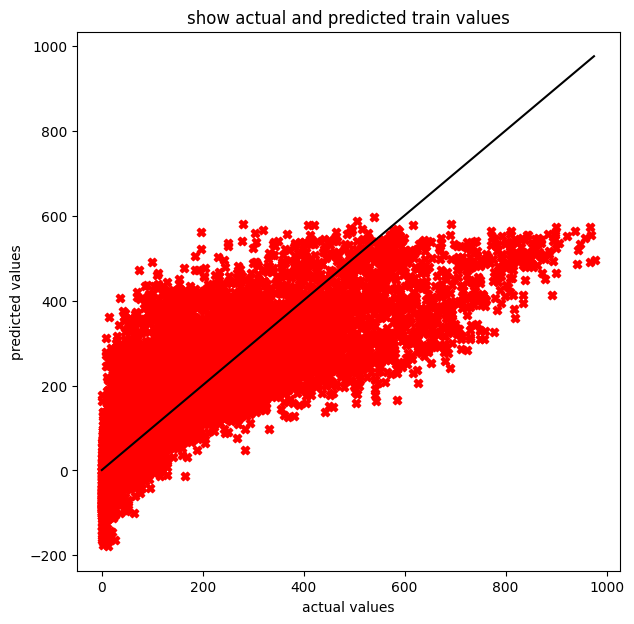

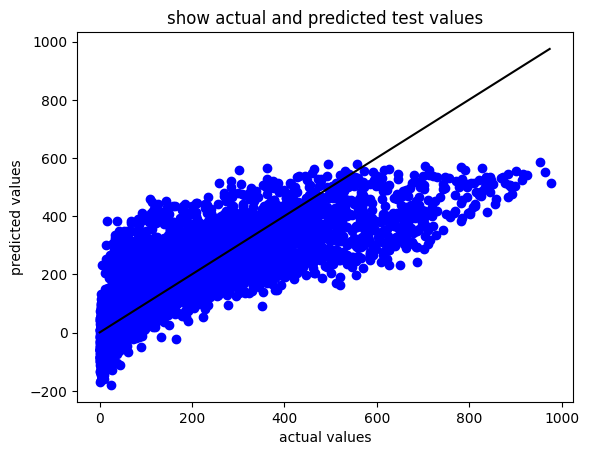

and has 0.6320995911202713 on train data and 0.6282030682772639 on test data



the model: DecisionTreeRegressor() :


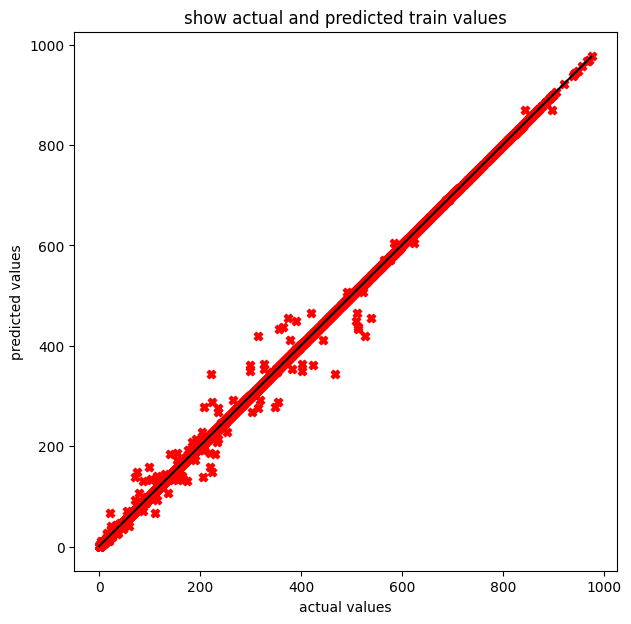

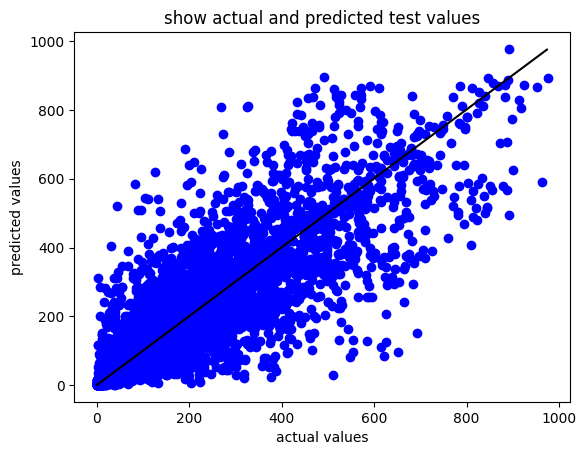

and has 0.9994838537597907 on train data and 0.6833648140849484 on test data



the model: RandomForestRegressor() :


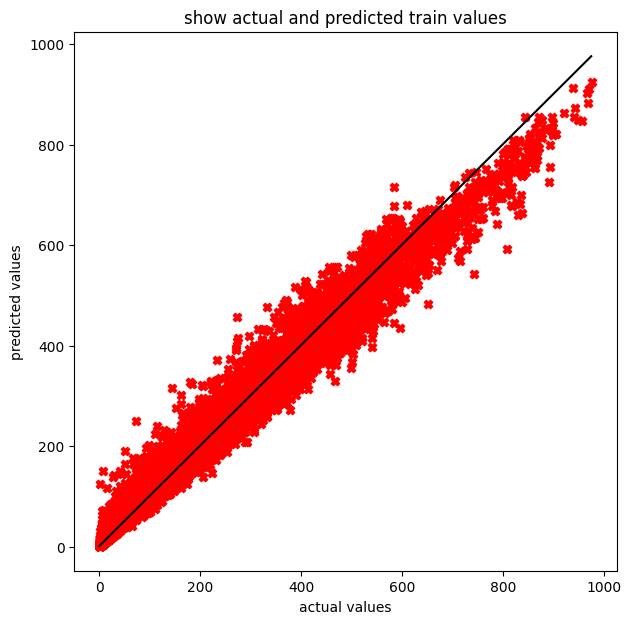

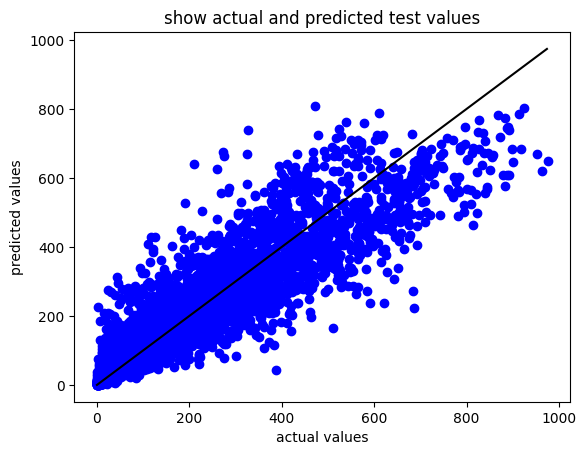

and has 0.9744967128179587 on train data and 0.8223777759017528 on test data



the model: Ridge() :


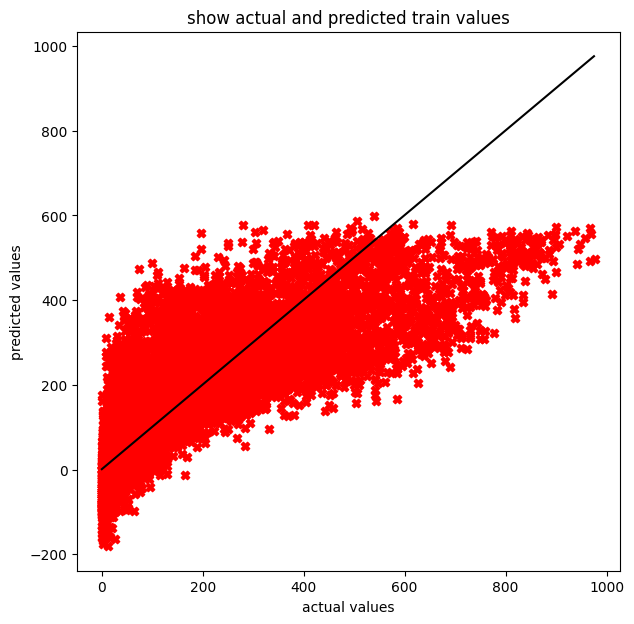

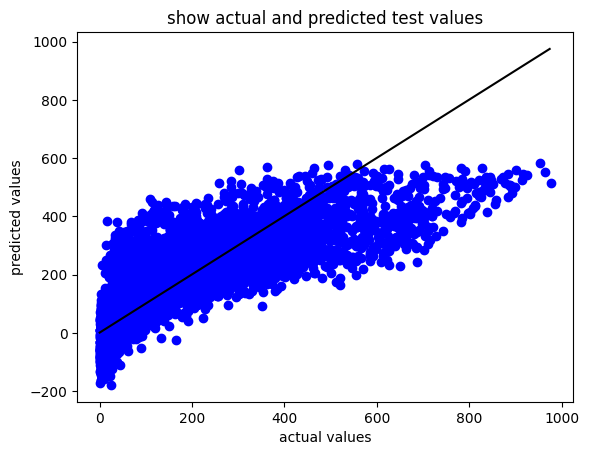

and has 0.6321335014050791 on train data and 0.6279483234759927 on test data



the model: HuberRegressor() :


C:\Users\dhrub\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


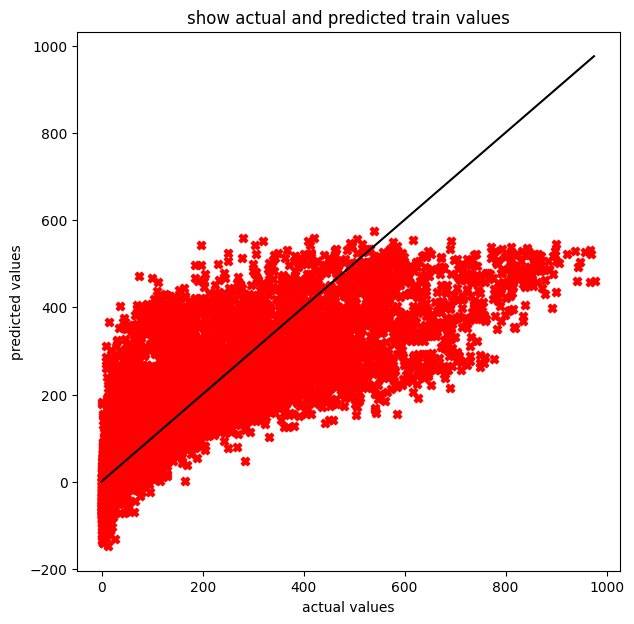

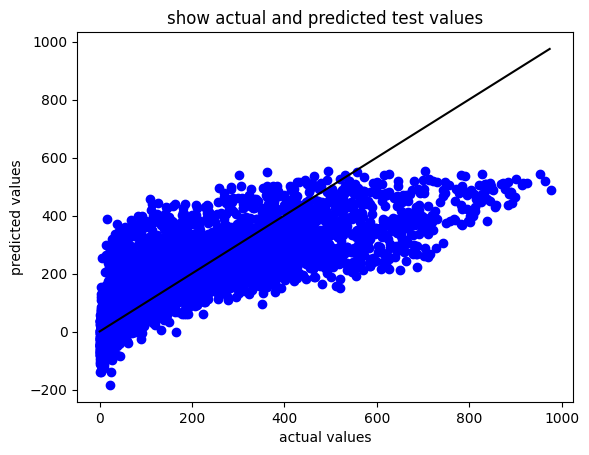

and has 0.6214441974159546 on train data and 0.6159623729890468 on test data



the model: ElasticNetCV() :


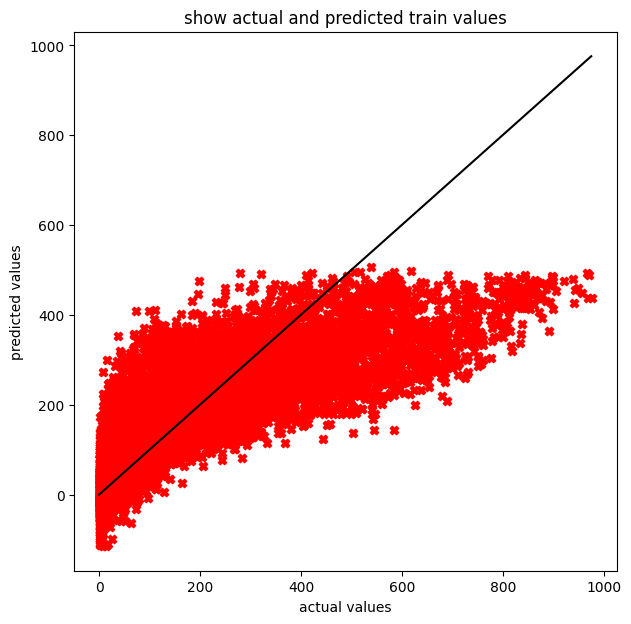

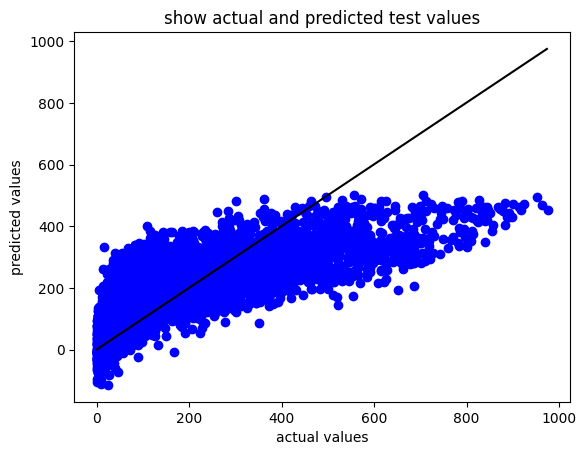

and has 0.5861524206200648 on train data and 0.5821462195557097 on test data



the model: GradientBoostingRegressor() :


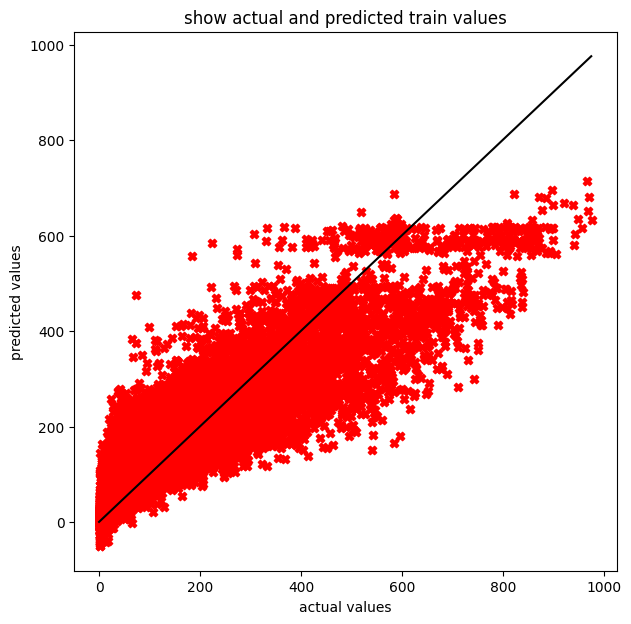

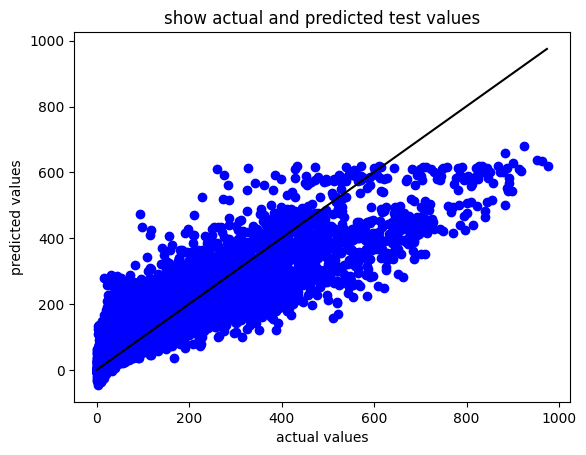

and has 0.7562956087739462 on train data and 0.734686230684376 on test data



the model: ExtraTreesRegressor() :


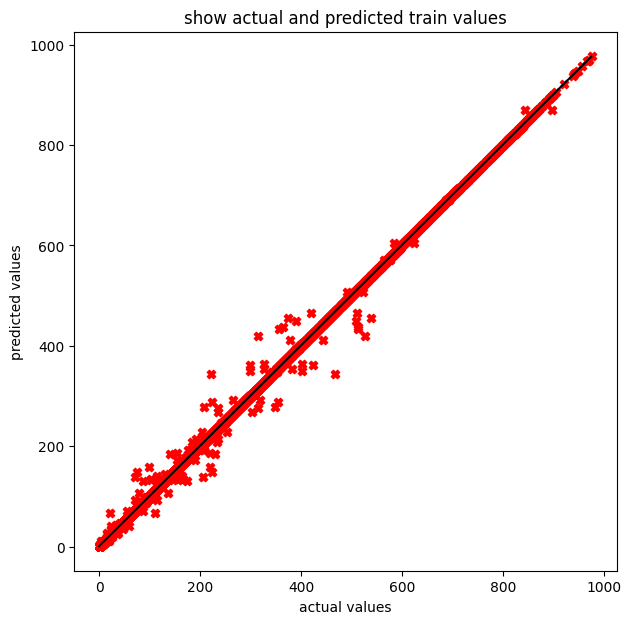

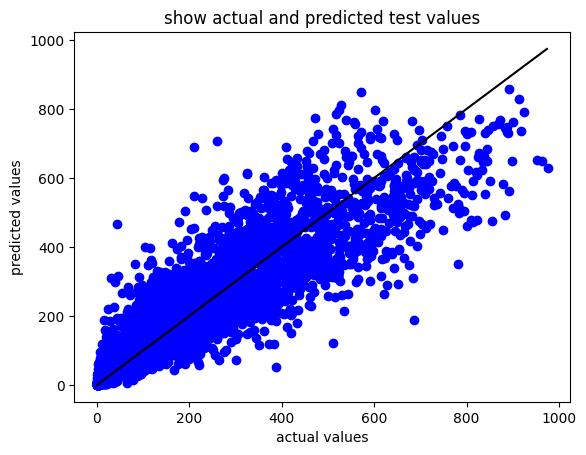

and has 0.9994838265228737 on train data and 0.8118246959475306 on test data





In [30]:
Models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    Ridge(),
    HuberRegressor(),
    ElasticNetCV(),
    GradientBoostingRegressor(),
    ExtraTreesRegressor()
]
for model in Models: 
    print("the model:",model,":")
    accuracy_train_pred, accuracy_test_pred = Train_predict(model,x_train,x_test,y_train,y_test)
    print("and has",accuracy_train_pred,"on train data and",accuracy_test_pred,"on test data\n\n\n")